In [62]:
#first let us get a list of all 5 letter english words from https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
import nltk
from urllib.request import urlopen
import re
import pandas as pd
import matplotlib.pyplot as plt
from math import log2

In [63]:
url = "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt"
file = urlopen(url)
output = str()
for line in file:
    decoded_line = line.decode("utf-8")
    output = output + decoded_line

In [64]:
words = output.split('\n')

In [65]:
words[0]

'2'

In [66]:
fiveLetterWords_ = []

pattern = re.compile("^[a-z]*$")
for word in words:
  if len(word) == 5 and pattern.match(word) != None:
    fiveLetterWords_.append(word.lower())



fiveLetterWords = list(dict.fromkeys(fiveLetterWords_))


In [67]:
print(fiveLetterWords[0:10])

['aahed', 'aalii', 'aargh', 'abaca', 'abaci', 'aback', 'abada', 'abaff', 'abaft', 'abaka']


In [68]:
fiveLetterWordChar = list()
for i in range(len(fiveLetterWords)):
  fiveLetterWordChar.append(list(fiveLetterWords[i]))
print(fiveLetterWordChar[0])


['a', 'a', 'h', 'e', 'd']


In [69]:
df = pd.DataFrame(fiveLetterWordChar)
print(df.head())

   0  1  2  3  4
0  a  a  h  e  d
1  a  a  l  i  i
2  a  a  r  g  h
3  a  b  a  c  a
4  a  b  a  c  i


In [70]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12927 entries, 0 to 12926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12927 non-null  object
 1   1       12927 non-null  object
 2   2       12927 non-null  object
 3   3       12927 non-null  object
 4   4       12927 non-null  object
dtypes: object(5)
memory usage: 505.1+ KB


In [71]:
#we plot histograms of frequency of all the letters by position
df[0].value_counts()

s    1509
c     946
a     928
b     868
t     829
p     790
d     669
m     618
g     616
f     599
r     582
l     516
h     438
w     407
k     366
e     335
n     326
u     294
o     289
i     250
v     244
j     193
y     134
z      93
q      71
x      17
Name: 0, dtype: int64

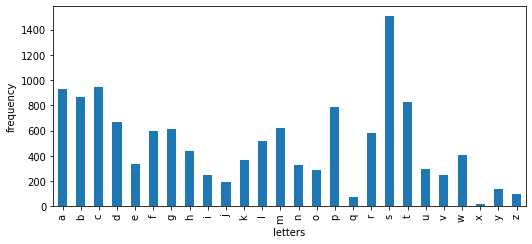

In [72]:
#we plot the frequency count by position
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df[0].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='letters', ylabel='frequency')

In [73]:
df[0].value_counts()

s    1509
c     946
a     928
b     868
t     829
p     790
d     669
m     618
g     616
f     599
r     582
l     516
h     438
w     407
k     366
e     335
n     326
u     294
o     289
i     250
v     244
j     193
y     134
z      93
q      71
x      17
Name: 0, dtype: int64

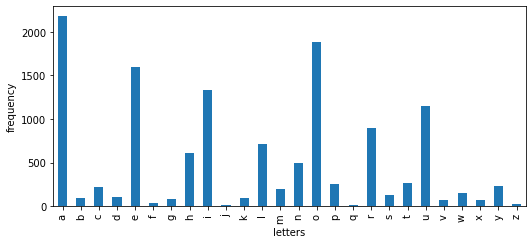

In [74]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df[1].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='letters', ylabel='frequency')


In [75]:
df[1].value_counts()

a    2183
o    1889
e    1600
i    1336
u    1144
r     899
l     710
h     606
n     499
t     271
p     249
y     227
c     223
m     194
w     154
s     128
d     110
b      94
k      89
g      84
v      71
x      70
f      38
z      26
q      18
j      15
Name: 1, dtype: int64

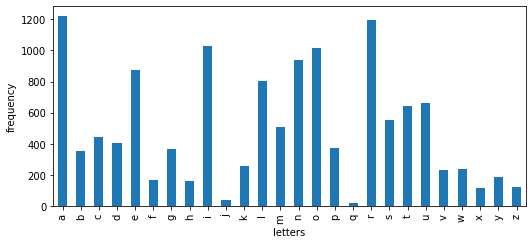

In [76]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df[2].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='letters', ylabel='frequency')

In [77]:
df[2].value_counts()

a    1221
r    1196
i    1030
o    1016
n     935
e     874
l     803
u     661
t     644
s     555
m     510
c     441
d     403
p     376
g     367
b     353
k     257
w     241
v     233
y     185
f     170
h     159
z     122
x     114
j      40
q      21
Name: 2, dtype: int64

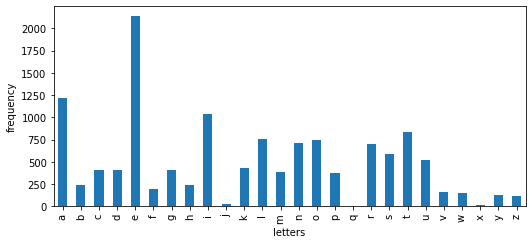

In [78]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df[3].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='letters', ylabel='frequency')

In [79]:
df[3].value_counts()

e    2141
a    1217
i    1038
t     836
l     761
o     742
n     715
r     702
s     586
u     521
k     425
c     406
d     404
g     402
m     388
p     374
h     242
b     236
f     195
v     163
w     146
y     127
z     117
j      26
x      15
q       2
Name: 3, dtype: int64

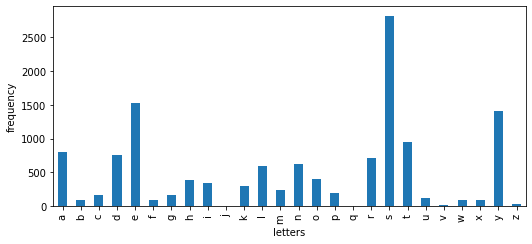

In [80]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df[4].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='letters', ylabel='frequency')

In [81]:
df[4].value_counts()

s    2813
e    1525
y    1406
t     953
a     808
d     761
r     711
n     619
l     589
o     399
h     390
i     338
k     293
m     245
p     199
c     172
g     168
u     122
w      93
f      90
x      85
b      85
z      38
v      19
q       4
j       2
Name: 4, dtype: int64

In [82]:
#you have to type a 5 letter word
#oracle will tell you if the letters in the word you have typed are 
#1. present but at other position
#2. not present
#3. present and at this position


First we think of a static algorithm to win at wordle.

We need to find 5 words that give us the most information about the word,
then we need to make a guess as to what our last word could be.

What 5 words to choose to obtain maximum information from the oracle.

1. We want to choose words that have unique letters
2. based on the frequency distribution, we should choose words that have the most common letters in their position
3. for Example we should choose words so that the first coloum in some permutation of [scabt] because those the most common 5 first-letters of letter words. [scabt], [aoeiu], [arion],[eaitl], [seyta].
4. maybe we can think beyond the 5 most frequent letters too
5. first let us think of a statistical technique, and then let us think of a way to train a model to learn the best words.


Let us try to calculate how much information, each word is giving us if used as first word. this will have to be an n^2 algorithm which simply compares two words. 

We will treat output from oracle like a base 3 number and try to plot its frequency distribution.

In [83]:
def outputGuessResults(word, target):
  output = 0;
  for i, letter in enumerate(word):
    temp = 0
    if(letter == target[i]):
      temp = 1;
    elif (letter in target):
      temp = 2;
    output += temp * (3**i)
  return output 

In [84]:
print(outputGuessResults("boxes", "boxes"))

121


Now we calculate the entropy of each of the words information.

This method is flawed because we already know a distribution on the input set, so maybe we should utilize that information as well


In [85]:
def calculateEntropy(word, database):
  frequencies=[]
  n = len(database)
  #print(n)
  frequencies = [0 for i in range(n)] 
  for target in database:
    frequencies[outputGuessResults(word, target)] += 1
  entropy = 0;
  for i in frequencies:
    p = float(i)/n
    if p != 0:
      #print(p)
      entropy += -(p)*log2(p)
  return entropy 


In [ ]:
entropy = {}
for i, word in enumerate(fiveLetterWords):
  print(i)
  entropy[word] = calculateEntropy(word, fiveLetterWords) 

Streaming output truncated to the last 5000 lines.
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116

In [26]:
print(entropy)

NameError: ignored

In [ ]:
sort_entropy = sorted(entropy.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print(sort_entropy)

[('tares', 6.182017993623654), ('teras', 6.08317724516709), ('rates', 6.078700956871145), ('rales', 6.055643367058715), ('tales', 6.045364820891538), ('salet', 6.031609845953398), ('nares', 6.030745353826883), ('tears', 6.0201230645486685), ('saner', 5.980753258471707), ('tarse', 5.980705569744428), ('serta', 5.968788821836646), ('serai', 5.967661939433788), ('tires', 5.954727458599805), ('cares', 5.948067184259875), ('treas', 5.9465615478534835), ('reals', 5.942669009752445), ('seral', 5.942440585205425), ('teals', 5.938326647411454), ('lanes', 5.937315521164264), ('raise', 5.936654749872421), ('lears', 5.930523167988435), ('taels', 5.92606071850998), ('aloes', 5.925567090563542), ('strae', 5.917336031181158), ('tarie', 5.916132482111297), ('nates', 5.907324343683801), ('taise', 5.906443537883097), ('pares', 5.905814717431336), ('seora', 5.9037754588717), ('earls', 5.901854636632612), ('tries', 5.897574916767333), ('slare', 5.886559535283609), ('lores', 5.886170577705318), ('mares', 5


Now we have some indication of how much information each word gives us, naively we could choose the top five words by information, pass that to the wordle oracle and then guess the last word.

There are several flaws with this method
1. We are not using the existing probability distribution of the letters, obviously if there is a rare letter in a position, that is much more information than confirmation of a common letter
2. All the top words in the wordle bot are similar, this is expected because similar words will have high values of entropy, but if we look at it from view of multiple queries then we will have only supplied 5 similar queries to the oracle.
3. But we are moving closer to choosing the first word ideally.
4. If we are able to integrate the prior information of the letter distribution into calculating a measure of information from each word, we can point out the statistically best word to choose as a first word.


Slight detour to build a wordle bot that just eliminates the most number of words with each selection.

In [86]:
#choosing the first word

def eliminatedWord(guess, word, solution):
  #is word eliminated by guess on solution
  charat = [-1, -1, -1, -1, -1]
  contains = set()
  counter = -1
  for letter in guess:
    counter+=1
    if(letter in solution):
      contains.add(letter);
      if(solution[counter] == letter):
        charat[counter] = letter
  for i, ele in enumerate(charat):
    if(ele != -1 and ele != solution[i]):
      return True
  for ele in contains:
    if(ele not in solution):
      return True
  return False

def wordsEliminated(guessWord, listWords):
  averageWordsEliminated = 0
  counter = 0
  for word in listWords:
    #how many words does this word eliminate
    for answer in listWords:
      counter += 1
      print(counter)
      if(eliminatedWord(guessWord, word, answer)):
        
        averageWordsEliminated+=1;
  averageWordsEliminated = float(averageWordsEliminated)/len(listWords)
  

In [ ]:
print(wordsEliminated("tares", fiveLetterWords))

Streaming output truncated to the last 5000 lines.
10795575
10795576
10795577
10795578
10795579
10795580
10795581
10795582
10795583
10795584
10795585
10795586
10795587
10795588
10795589
10795590
10795591
10795592
10795593
10795594
10795595
10795596
10795597
10795598
10795599
10795600
10795601
10795602
10795603
10795604
10795605
10795606
10795607
10795608
10795609
10795610
10795611
10795612
10795613
10795614
10795615
10795616
10795617
10795618
10795619
10795620
10795621
10795622
10795623
10795624
10795625
10795626
10795627
10795628
10795629
10795630
10795631
10795632
10795633
10795634
10795635
10795636
10795637
10795638
10795639
10795640
10795641
10795642
10795643
10795644
10795645
10795646
10795647
10795648
10795649
10795650
10795651
10795652
10795653
10795654
10795655
10795656
10795657
10795658
10795659
10795660
10795661
10795662
10795663
10795664
10795665
10795666
10795667
10795668
10795669
10795670
10795671
10795672
10795673
10795674
10795675
10795676
10795677
10795678
10795679
1079

In [87]:
#building a random bot
#choose a random word
#reduce set size
#till setsize is not 1
import random

answer = random.randint(0, len(fiveLetterWords)-1)


In [88]:
answer

11921

In [89]:
def randomSolver(answer, fiveLetterWords):
  wordSet = fiveLetterWords
  counter = 0
  while(len(wordSet) > 1):
    counter += 1
    #choose a random word from the wordset
    guess = random.sample(wordSet, 1)
    print(guess)
    #see if is correct answer
    if(guess == answer):
      return counter
    else:
      i = 0
      temp = []
      while(i < len(wordSet)):
        if(not eliminatedWord(guess, wordSet[i], answer)):
          #print("added")
          temp.append(wordSet[i])
      wordSet = temp
      print(len(wordSet))
  return wordSet[0]
    #if not out

In [ ]:
for i in range(1):
  print(i)
  answer = fiveLetterWords[random.randint(0, len(fiveLetterWords)-1)]
  print(randomSolver(answer, fiveLetterWords))

0
['gonal']
